# 運動学的方程式の導出 （XYZオイラー角）

吉田勝俊（宇都宮大学）

## 参考情報
- [SymPyで代数演算してみる - Qiita](https://qiita.com/zawawahoge/items/1be137a8147902a5e6cb)
- [Matrices (linear algebra) &#8212; SymPy 1.6.2 documentation](https://docs.sympy.org/latest/modules/matrices/matrices.html)

In [ ]:
import sympy as sym #数式処理ライブラリ
sym.init_printing() #数式を綺麗に表示する設定

## Sympy 変数・関数

In [ ]:
om1, om2, om3 = sym.symbols('ω_1 ω_2 ω_3')
th1, th2, th3 = sym.symbols('θ_1 θ_2 θ_3', Real=True, positive=True)
dth1, dth2, dth3 = sym.symbols('\dot{θ}_1 \dot{θ}_2 \dot{θ}_3', Real=True, positive=True)

In [ ]:
th = sym.Matrix([th1,th2,th3]) #オイラー角
dth = sym.Matrix([dth1,dth2,dth3]) #その時間微分

display(th)
display(dth)

⎡θ₁⎤
⎢  ⎥
⎢θ₂⎥
⎢  ⎥
⎣θ₃⎦

⎡\dot{θ}₁⎤
⎢        ⎥
⎢\dot{θ}₂⎥
⎢        ⎥
⎣\dot{θ}₃⎦

#### テスト

In [ ]:
th.dot(dth)

## ZYZオイラー角による回転行列

In [ ]:
def RotX(th): #X軸回転の行列
    return sym.Matrix([
        [1, 0, 0],
        [0, sym.cos(th), -sym.sin(th)],
        [0, sym.sin(th),  sym.cos(th)],
    ])

def RotY(th): #Y軸回転の行列
    return sym.Matrix([
        [sym.cos(th), 0, sym.sin(th)],
        [0, 1, 0],
        [-sym.sin(th), 0, sym.cos(th)],
    ])

def RotZ(th): #Z軸回転の行列
    return sym.Matrix([
        [sym.cos(th), -sym.sin(th), 0],
        [sym.sin(th),  sym.cos(th), 0],
        [0, 0, 1],
    ])

Rot = RotZ(th3)*RotY(th2)*RotX(th1)
Rot

⎡cos(θ₂)⋅cos(θ₃)  sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) - sin(θ₃)⋅cos(θ₁)  sin(θ₁)⋅sin(θ₃) +
⎢                                                                             
⎢sin(θ₃)⋅cos(θ₂)  sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₃)  -sin(θ₁)⋅cos(θ₃) 
⎢                                                                             
⎣   -sin(θ₂)                   sin(θ₁)⋅cos(θ₂)                            cos(

 sin(θ₂)⋅cos(θ₁)⋅cos(θ₃) ⎤
                         ⎥
+ sin(θ₂)⋅sin(θ₃)⋅cos(θ₁)⎥
                         ⎥
θ₁)⋅cos(θ₂)              ⎦

### LaTeXソースの出力

In [ ]:
print(sym.latex(Rot))

\left[\begin{matrix}\cos{\left(θ_{2} \right)} \cos{\left(θ_{3} \right)} & \sin{\left(θ_{1} \right)} \sin{\left(θ_{2} \right)} \cos{\left(θ_{3} \right)} - \sin{\left(θ_{3} \right)} \cos{\left(θ_{1} \right)} & \sin{\left(θ_{1} \right)} \sin{\left(θ_{3} \right)} + \sin{\left(θ_{2} \right)} \cos{\left(θ_{1} \right)} \cos{\left(θ_{3} \right)}\\\sin{\left(θ_{3} \right)} \cos{\left(θ_{2} \right)} & \sin{\left(θ_{1} \right)} \sin{\left(θ_{2} \right)} \sin{\left(θ_{3} \right)} + \cos{\left(θ_{1} \right)} \cos{\left(θ_{3} \right)} & - \sin{\left(θ_{1} \right)} \cos{\left(θ_{3} \right)} + \sin{\left(θ_{2} \right)} \sin{\left(θ_{3} \right)} \cos{\left(θ_{1} \right)}\\- \sin{\left(θ_{2} \right)} & \sin{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)} & \cos{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)}\end{matrix}\right]


### 回転行列の時間微分

In [ ]:
def sympy_dt_param(expr, param_vec, dparam_vec):
    """
    パラメータを時間の関数として時間微分する関数
        param_vec: パラメータベクトル sympy.Matrix([sympyのシンボル達]) 
        dparam_vec: パラメータベクトルの微分 sympy.Matrix([sympyのシンボル達])
    """
    dim = len(param_vec)
    result = expr
   
    # 仮の時間変数
    t = sym.symbols('t')

    # パラメータを時間関数で置換
    func_vec = []
    for i in range(dim):
        lab = 'param' + str(i) #仮の変数表示名
        fun = sym.symbols(lab, cls=sym.Function, Real=True)
        func_vec.append( fun(t) )

    func_vec = sym.Matrix(func_vec) #sympy型へ変換
    
    for i in range(dim):
        result = result.replace(param_vec[i],func_vec[i])

    # 時間微分を実行
    result = result.diff()
    dfunc_vec = func_vec.diff()
    
    # 時間関数を元のパラメータに戻す
    for i in range(dim):
        result = result.replace(dfunc_vec[i], dparam_vec[i])
        result = result.replace(func_vec[i], param_vec[i])

    return result

回転行列を実際に時間微分する

In [ ]:
dRot = sympy_dt_param(Rot, th, dth)
dRot

⎡-\dot{θ}₂⋅sin(θ₂)⋅cos(θ₃) - \dot{θ}₃⋅sin(θ₃)⋅cos(θ₂)  \dot{θ}₁⋅sin(θ₁)⋅sin(θ₃
⎢                                                                             
⎢-\dot{θ}₂⋅sin(θ₂)⋅sin(θ₃) + \dot{θ}₃⋅cos(θ₂)⋅cos(θ₃)  -\dot{θ}₁⋅sin(θ₁)⋅cos(θ
⎢                                                                             
⎣                 -\dot{θ}₂⋅cos(θ₂)                                           

) + \dot{θ}₁⋅sin(θ₂)⋅cos(θ₁)⋅cos(θ₃) + \dot{θ}₂⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - \dot
                                                                              
₃) + \dot{θ}₁⋅sin(θ₂)⋅sin(θ₃)⋅cos(θ₁) + \dot{θ}₂⋅sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) + \do
                                                                              
                              \dot{θ}₁⋅cos(θ₁)⋅cos(θ₂) - \dot{θ}₂⋅sin(θ₁)⋅sin(

{θ}₃⋅sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) - \dot{θ}₃⋅cos(θ₁)⋅cos(θ₃)   -\dot{θ}₁⋅sin(θ₁)⋅si
                                                                              
t{θ}₃⋅sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) - \dot{θ}₃⋅sin(θ₃)⋅c

### 回転行列の逆行列

In [ ]:
invRot = Rot.transpose() #回転行列なので転置で求まる
invRot

⎡             cos(θ₂)⋅cos(θ₃)                            sin(θ₃)⋅cos(θ₂)      
⎢                                                                             
⎢sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) - sin(θ₃)⋅cos(θ₁)  sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + cos(θ₁)⋅
⎢                                                                             
⎣sin(θ₁)⋅sin(θ₃) + sin(θ₂)⋅cos(θ₁)⋅cos(θ₃)  -sin(θ₁)⋅cos(θ₃) + sin(θ₂)⋅sin(θ₃)

             -sin(θ₂)    ⎤
                         ⎥
cos(θ₃)   sin(θ₁)⋅cos(θ₂)⎥
                         ⎥
⋅cos(θ₁)  cos(θ₁)⋅cos(θ₂)⎦

### 角速度ベクトルの外積行列 $[\boldsymbol{\omega}\times]:=R^{-1}\dot{R}$

In [ ]:
OMcross = sym.simplify(invRot*dRot)

### 外積行列 $[\boldsymbol{\omega}\times]:=R^{-1}\dot{R}$ から角速度ベクトル $\boldsymbol{\omega}$ を抽出

In [ ]:
OMvec = sym.Matrix([OMcross[2,1],OMcross[0,2],OMcross[1,0]])
OMvec

⎡        \dot{θ}₁ - \dot{θ}₃⋅sin(θ₂)         ⎤
⎢                                            ⎥
⎢\dot{θ}₂⋅cos(θ₁) + \dot{θ}₃⋅sin(θ₁)⋅cos(θ₂) ⎥
⎢                                            ⎥
⎣-\dot{θ}₂⋅sin(θ₁) + \dot{θ}₃⋅cos(θ₁)⋅cos(θ₂)⎦

### 行列表示 $\boldsymbol{\omega}=\Omega \dot{\boldsymbol{\theta}}$ の表現行列 $\Omega$

In [ ]:
tmp = OMvec
OMmat = tmp.jacobian(dth)
OMmat

⎡1     0         -sin(θ₂)    ⎤
⎢                            ⎥
⎢0  cos(θ₁)   sin(θ₁)⋅cos(θ₂)⎥
⎢                            ⎥
⎣0  -sin(θ₁)  cos(θ₁)⋅cos(θ₂)⎦

### LaTeXソースの出力

In [ ]:
print(sym.latex(OMmat))

\left[\begin{matrix}1 & 0 & - \sin{\left(θ_{2} \right)}\\0 & \cos{\left(θ_{1} \right)} & \sin{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)}\\0 & - \sin{\left(θ_{1} \right)} & \cos{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)}\end{matrix}\right]


### $\Omega(\boldsymbol{\theta},\dot{\boldsymbol{\theta}})$ を $\dot{\boldsymbol{\theta}}$ について解き，運動学的方程式 $\dot{\boldsymbol{\theta}}=K(\boldsymbol{\theta},\boldsymbol{\omega})$ を導く

#### $\dot{\boldsymbol{\theta}}$ について解く

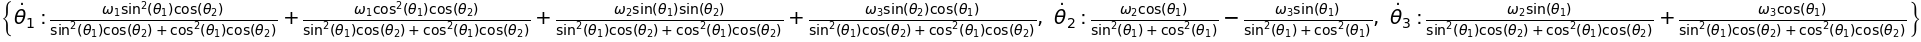

In [ ]:
var = dth
oms = sym.Matrix([om1, om2, om3])
equations = OMmat*var - oms
result = sym.solve(equations, var)
result

#### 解から$K(\boldsymbol{\theta},\boldsymbol{\omega})$を作る

In [ ]:
Kfunc = sym.Matrix([result[dth[i]] for i in range(3)])
Kfunc = sym.simplify(Kfunc)
Kfunc

⎡ω₁ + ω₂⋅sin(θ₁)⋅tan(θ₂) + ω₃⋅cos(θ₁)⋅tan(θ₂)⎤
⎢                                            ⎥
⎢          ω₂⋅cos(θ₁) - ω₃⋅sin(θ₁)           ⎥
⎢                                            ⎥
⎢          ω₂⋅sin(θ₁) + ω₃⋅cos(θ₁)           ⎥
⎢          ───────────────────────           ⎥
⎣                  cos(θ₂)                   ⎦

## 運動学的方程式 $\dot{\boldsymbol{\theta}}=K(\boldsymbol{\theta},\boldsymbol{\omega})$ の行列表示

- 線形変換 $K(\boldsymbol{q},\boldsymbol{\omega})$ のヤコビ行列＝表現行列なので，ヤコビ行列を求める関数 [jacobian(X)](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixCalculus.jacobian) を流用しました．

### $\dot{\boldsymbol{\theta}} = K_{\omega}\boldsymbol{\theta}$ 型の表現行列

オイラー角は，$\theta_1$, $\theta_2$, $\theta_3$ に関して非線形（三角関数の中身）なので，この型の表現行列は取れません． 

### $\dot{\boldsymbol{\theta}} = K_{\boldsymbol{\theta}}\boldsymbol{\omega}$ 型の表現行列

In [ ]:
Kth = Kfunc.jacobian(oms)
Kth

⎡1  sin(θ₁)⋅tan(θ₂)  cos(θ₁)⋅tan(θ₂)⎤
⎢                                   ⎥
⎢0      cos(θ₁)         -sin(θ₁)    ⎥
⎢                                   ⎥
⎢       sin(θ₁)          cos(θ₁)    ⎥
⎢0      ───────          ───────    ⎥
⎣       cos(θ₂)          cos(θ₂)    ⎦

### LaTeXソースの出力

In [ ]:
print(sym.latex(Kth))

\left[\begin{matrix}1 & \sin{\left(θ_{1} \right)} \tan{\left(θ_{2} \right)} & \cos{\left(θ_{1} \right)} \tan{\left(θ_{2} \right)}\\0 & \cos{\left(θ_{1} \right)} & - \sin{\left(θ_{1} \right)}\\0 & \frac{\sin{\left(θ_{1} \right)}}{\cos{\left(θ_{2} \right)}} & \frac{\cos{\left(θ_{1} \right)}}{\cos{\left(θ_{2} \right)}}\end{matrix}\right]
